<a href="https://colab.research.google.com/github/KaiJungWu/RCA/blob/main/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import pickle


In [26]:
#1. Definition of functions

def CNNDataPrep(mtrx, time_step):
    """ Prepares the data for CNN input.
        The output array has 4-D structure as
        (batch_size, timestep, input_dim, color_channel).
    """
    data_temp = list()

    for num in range(0, mtrx.shape[0]-time_step+1):
            data_temp1 = mtrx[num:num+time_step, :]
            data_temp.append(data_temp1)

    Temp_out = np.array(data_temp)
    Temp_out = Temp_out[:,:,:,np.newaxis]

    return Temp_out


In [27]:
def DataSplit(mtrx, split_num):
    """ Split data array into two at the specified position.
    """
    mtrx_len = mtrx.shape[0]
    if split_num > mtrx_len:
        print('DataSplit: split_num must be smaller than data length.')
        return np.zeros(1), np.zeros(1)
    else:
        return mtrx[:split_num,...], mtrx[split_num:, ...]

In [28]:
def PeakHold(ParamOut, time_step):
    """
    Apply peak-hold for input data array.
    """

    df_len = ParamOut.shape[0]

    if time_step>df_len:
        print('PeakHold: Peak-hold time step must be smaller \
              than the data length.')
    elif time_step==0:
        return ParamOut
    else:
        list_temp = list(0 for i in range(0,time_step-1))
        sr = pd.Series(ParamOut)

        for i in range(0, df_len - time_step + 1):
            list_temp.append(sr[i:i+time_step].max())

        return np.array(list_temp)

In [29]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
  inflating: Data/Selected_Parameters_01.csv  
  inflating: Data/Selected_Parameters_02.csv  
  inflating: Data/TL_01.csv          
  inflating: Data/TL_02.csv          
  inflating: Data/UC2-1.csv          
  inflating: Data/UC2-2.csv          
  inflating: Data/UC2-3.csv          
  inflating: Data/UC2-3_2days.csv    
  inflating: Data/UC2-4.csv          


In [30]:
#2. Data input

#2-1. Data path definition

CSVDataPath = '/content/Data/'
#Please define the correct data file path here.

#2-2. CSV data file input
df_Period1 = pd.read_csv(CSVDataPath + 'UC2-1.csv')
df_Period2 = pd.read_csv(CSVDataPath + 'UC2-2.csv')
df_Period3 = pd.read_csv(CSVDataPath + 'UC2-3.csv')
df_Period4 = pd.read_csv(CSVDataPath + 'UC2-4.csv')


In [31]:
print(f'UC2-1 : {df_Period1.shape}')
print(f'UC2-2 : {df_Period2.shape}')
print(f'UC2-3 : {df_Period3.shape}')
print(f'UC2-4 : {df_Period4.shape}')

UC2-1 : (44640, 164)
UC2-2 : (20160, 164)
UC2-3 : (63360, 164)
UC2-4 : (17280, 164)


In [32]:
#2-3. Preparation of variables
ParamNames = pd.read_csv(CSVDataPath +
                         'Selected_Parameters_01.csv').values #Parameter list
Longest_MH = np.amax(ParamNames[:,1]) #Longest Max-hold length
lookback = 30 #Time-steps of CNN input data

df_train1 = pd.DataFrame()
df_train2 = pd.DataFrame()
df_train3 = pd.DataFrame()
df_train4 = pd.DataFrame()
df_valid1 = pd.DataFrame()
df_valid2 = pd.DataFrame()



In [33]:
#3. CNN Input data preparation

for (Target_Param, Max_hold_steps, Log_Convert, Log_base) in ParamNames:#Loop for each parameter
    print(Target_Param)

    day1_split = -1
    day2_split = 8641

#3-1. Data variables set-up
    Param_period1 = df_Period1[Target_Param].values
    Param_period2 = df_Period2[Target_Param].values
    Param_period3 = df_Period3[Target_Param].values
    Param_period4 = df_Period4[Target_Param].values

#3-2. Max-hold calculation
    Param_period1 = PeakHold(Param_period1, Max_hold_steps)
    Param_period2 = PeakHold(Param_period2, Max_hold_steps)
    Param_period3 = PeakHold(Param_period3, Max_hold_steps)
    Param_period4 = PeakHold(Param_period4, Max_hold_steps)

    Param_period4_1, Param_period4_2 =\
        DataSplit(Param_period4, day2_split)

    df_train1[Target_Param] = Param_period1
    df_train2[Target_Param] = Param_period2
    df_train3[Target_Param] = Param_period3
    df_valid1[Target_Param] = Param_period4_1 #Data4_1 for verification period 1
    df_valid2[Target_Param] = Param_period4_2 #

ACTLD
GT Load
GT SPEED
T1C
CSO
PLCSO
MCSO
IGV pos
IGVCSO
BYREF
BV pos
T2C
BPT(ave)
EXT(ave)
Pcs
Tcc(up)
Tcc(low)
PL FCV dP
M FCV dP
Tf
FG P mani press
FG M mani press
FG supply press
PL FCV pos
PL PCV pos
M FCV pos
M PCV pos
FG PL ratio
FG flow
PLFCSO
PLPCSO
MFMCSO
MPACSO
Tamb
RH
Pamb
NOX(15%O2)
Inlet filter dP (1st)
Inlet filter dP (2nd)
Inlet filter dP (3rd)
FG LHV
FG density
FG supply press AGI
C1 Methane
C2 Ethane
C3 Propane
n-C4 n-Butane
n-C4 i-Butane
n-C5 n-Pantane
n-C5 i-Pantane
Neo-C5 neo-Pentane
C6 Haxane
CO2
N2
RCA temp (R)
RCA temp (L)
R2 DCT (R)
R2 DCT (L)
R3 DCT (R)
R3 DCT (L)
R4 DCT (R)
R4 DCT (L)
R4 DCT (DS)


In [34]:
print(f' df_train1 : {df_train1.shape}')
print(f' df_train2 : {df_train2.shape}')
print(f' df_train3 : {df_train3.shape}')
print(f' df_valid1 : {df_valid1.shape}')
print(f' df_valid2 : {df_valid2.shape}')

 df_train1 : (44640, 63)
 df_train2 : (20160, 63)
 df_train3 : (63360, 63)
 df_valid1 : (8641, 63)
 df_valid2 : (8639, 63)


In [35]:
#3-4. Data scaling

Raw_train1 = df_train1.values
Raw_train2 = df_train2.values
Raw_train3 = df_train3.values
Raw_valid1 = df_valid1.values
Raw_valid2 = df_valid2.values

In [36]:

#Min-Max scaler set-up for whole training data
scaler = MinMaxScaler(copy=False)
X_whole = np.concatenate((Raw_train1, Raw_train2, Raw_train3),axis=0)
scaler.fit(X_whole)

MinMaxScaler(copy=False)

In [37]:

#scalling to all the data set
scaler.transform(Raw_train1)
scaler.transform(Raw_train2)
scaler.transform(Raw_train3)
scaler.transform(Raw_valid1)
scaler.transform(Raw_valid2)

array([[0.42555742, 0.39964689, 0.99738285, ..., 0.75481153, 0.76210169,
        0.82026854],
       [0.41896428, 0.38991044, 0.99750748, ..., 0.75563418, 0.76231516,
        0.82080578],
       [0.41800527, 0.38841784, 0.9976321 , ..., 0.754669  , 0.76193474,
        0.82008548],
       ...,
       [0.57875809, 0.54511657, 0.99725823, ..., 0.89380259, 0.89759786,
        0.89674315],
       [0.57875809, 0.54483671, 0.99725823, ..., 0.89370257, 0.89714081,
        0.89657601],
       [0.57959722, 0.54537571, 0.9971336 , ..., 0.89321248, 0.8965907 ,
        0.89621388]])

In [38]:
print(Raw_train1.shape)

(44640, 63)


In [39]:
#3-5. Data formatting for RNN input
X_train1 = CNNDataPrep(Raw_train1[Longest_MH:], lookback)
X_train2= CNNDataPrep(Raw_train2[Longest_MH:], lookback)
X_train3= CNNDataPrep(Raw_train3[Longest_MH:], lookback)
X_train = np.concatenate((X_train1, X_train2, X_train3), axis=0)#all the training data
#Two verification data sets prepared in this trial.
X_verify1 = CNNDataPrep(Raw_valid1[Longest_MH:], lookback)
X_verify2 = CNNDataPrep(Raw_valid2[Longest_MH:], lookback)

In [40]:
print(X_train1.shape)
print(X_train2.shape)
print(X_train3.shape)
print(X_train.shape)

(44611, 30, 63, 1)
(20131, 30, 63, 1)
(63331, 30, 63, 1)
(128073, 30, 63, 1)


In [41]:

#3-6. Saving the training & verification data
fpath = str(lookback)+'steps_UC2_CNN_R0'

np.savez_compressed(fpath, \
                    X_train = X_train, \
                    X_verify1 = X_verify1, \
                    X_verify2 = X_verify2)

#3-7. Saving the scaling information
pickle.dump(scaler, open('CNNscaler'+str(lookback)+'-steps_R0.pcl', 'wb'))



In [42]:
!pip install tensorflow

In [43]:
#1. Preparations
import tensorflow
import numpy as np
import pandas as pd
import pickle
import sklearn
import platform
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
#show important packages/libraries version
print(f"Tensor Flow Version: {tensorflow.__version__}")
#print(f"Keras Version: {keras.__version__}")
print(f"Scikit-Learn {sklearn.__version__}")
print(f"Python Version {platform.python_version()}")

Tensor Flow Version: 2.12.0
Scikit-Learn 1.2.2
Python Version 3.10.12


In [45]:
#definition of loss function (not used now)
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])


In [46]:

#time-step of RNN input data (must be same as the data imported)
time_steps = 30

#CSVDataPath = 'C:/Users/CSEUser1/R&D_trials/2021-22/11_CNN/Data/'#Data path
#ParamNames = pd.read_csv(CSVDataPath + 'Selected_Parameters_01.csv').values
#data list import

#Preparation for log conversion (not used now)
Log_Conv_index = list()
Log_Base_values = list()
k = 0
for (Target_Param, Max_hold_steps, Log_Convert, Log_base) in ParamNames:
    if Log_Convert == 1:
        Log_Conv_index.append(k)
        Log_Base_values.append(Log_base)
    k += 1

In [47]:
#2. Data read and set

#2-1. Data import

fpath = str(time_steps)+'steps_UC2_CNN_R0.npz'

npz1 = np.load(fpath)

X_train = npz1['X_train']
X_verify1 = npz1['X_verify1']
X_verify2 = npz1['X_verify2']

In [48]:
#2-2. Data shuffling
train_series = np.arange(len(X_train))
train_series_rand = np.random.permutation(train_series)
X_train2 = X_train[train_series_rand,:,:,:]
Y_train = X_train[train_series_rand,-1,:,0]#select each final row in each sample to be a y,This line is extracting the targets or labels, Y_train, from the shuffled X_train. The specific indexing -1 indicates that you're selecting the last timestep of each sample. The indexing 0 suggests that you're picking the first feature or channel of that timestep. This is typical in some tasks like time-series forecasting, where one might want to predict the next value based on a sequence of previous values.


In [49]:
#2-3. Data scaler import & application
scaler = pickle.load(open('CNNscaler' + str(time_steps) + '-steps_R0.pcl', 'rb'))

In [50]:
#Inverse scaling
#Applied on the last time-step "[:,-1,:,0]". Output is 2-D array.
scaler.inverse_transform(X_train[:,-1,:,0])
scaler.inverse_transform(X_verify1[:,-1,:,0])
scaler.inverse_transform(X_verify2[:,-1,:,0])

array([[ 171.75 ,  110.075, 3001.5  , ...,  304.18 ,  280.295,  206.8  ],
       [ 171.55 ,  109.914, 3001.5  , ...,  304.507,  280.323,  206.856],
       [ 170.8  ,  109.188, 3002.25 , ...,  304.442,  280.285,  206.942],
       ...,
       [ 237.35 ,  153.722, 3000.75 , ...,  357.454,  327.967,  225.339],
       [ 237.35 ,  153.641, 3000.75 , ...,  357.414,  327.8  ,  225.297],
       [ 237.7  ,  153.797, 3000.375, ...,  357.218,  327.599,  225.206]])

In [51]:
df_Xtrain = pd.DataFrame(X_train[:,-1,:,0])
df_Xverify1 = pd.DataFrame(X_verify1[:,-1,:,0])
df_Xverify2 = pd.DataFrame(X_verify2[:,-1,:,0])


In [52]:
print(df_Xtrain)

            0        1         2       3       4      5       6     7    8   \
0       180.80  113.964  2997.750  14.170  52.323  9.441  42.882  0.03  0.0   
1       183.10  116.192  2997.750  14.137  52.516  9.457  43.058  0.02  0.0   
2       181.55  114.510  2998.500  14.101  51.981  9.446  42.535  0.02  0.0   
3       181.75  114.644  2998.125  14.092  52.214  9.454  42.761  0.00  0.0   
4       181.60  114.529  2998.125  14.174  52.186  9.447  42.739  0.00  0.0   
...        ...      ...       ...     ...     ...    ...     ...   ...  ...   
128068   -0.40   -0.400     3.000  20.074  -5.000  0.000  -5.000  0.00  0.0   
128069   -0.25   -0.250     3.000  20.103  -5.000  0.000  -5.000  0.00  0.0   
128070   -0.35   -0.350     3.000  20.085  -5.000  0.000  -5.000  0.00  0.0   
128071   -0.45   -0.450     3.000  20.091  -5.000  0.000  -5.000  0.00  0.0   
128072   -0.30   -0.300     3.000  20.089  -5.000  0.000  -5.000  0.00  0.0   

             9   ...     53       54       55      

In [53]:

#Saving input data
df_Xtrain.to_csv('CNN_train.csv')
df_Xverify1.to_csv('CNN_verify1.csv')
df_Xverify2.to_csv('CNN_verify2.csv')

Output_name = 'CNN_out_' + str(time_steps) + 'steps.csv'
#df_node_num = pd.DataFrame({'Nodes': ['1st', '2nd', '3rd', '4th', 'LR']})


In [54]:
#3. CNN preparation

epochs = 100
batch_size = 128

early_stopping = EarlyStopping(monitor = 'loss', min_delta=0, patience=20)
DO_rate = 0.1

LR = 0.0005

#for node_num in GRU_nodes:

#print(node_num)

optimiser = keras.optimizers.Adam(LR)

model_CNN = keras.models.Sequential([
    Conv2D(64,5,activation='relu', padding='same',\
           input_shape=[time_steps,len(ParamNames),1]),
    MaxPooling2D(2),
    Conv2D(128,3,activation='relu',padding='same'),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Conv2D(256, 3, activation='relu', padding='same'),
    Conv2D(256, 3, activation='relu', padding='same'),
    MaxPooling2D(2),
    keras.layers.Flatten(),
    Dense(128, activation='relu'),
    Dropout(DO_rate),
    Dense(80, activation='relu'),
    Dropout(DO_rate),
    Dense(63, activation = 'linear')])

In [55]:
import tensorflow
#Use to recoord training time
import time
class TimingCallback(tensorflow.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.start_time = time.time()

    def on_train_end(self, logs=None):
        self.end_time = time.time()
        self.total_time = self.end_time - self.start_time
        print(f"Total training time: {self.total_time:.2f} seconds")

In [56]:
#evaluates the model on both the training and testing data and prints the corresponding accuracy scores and loss.
def evaluate_model(model, x_train, y_train, x_test, y_test,name=str):
    tr_loss, tr_accuracy = model.evaluate(x_train, y_train)
    ts_loss, ts_accuracy = model.evaluate(x_test, y_test)
    print(name)
    print("Training set Loss on model: {:2f}".format(tr_loss))
    print("Testing set Loss on model: {:2f}".format(ts_loss))
    print("Training set Accuracy on model: {:2f}".format(tr_accuracy))
    print("Testing set Accuracy on model: {:2f}".format(ts_accuracy))

#Print the accuracy and loss of the training and testing sets for the mlp_baseline
#evaluate_model(mlp_baseline,x_train, y_train, x_test, y_test,'mlp_baseline')

In [57]:
#Plot the loss function  and accuracy graph respect to the iteration/epoch
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(model,network):
    loss = model.history["loss"]
    val_loss = model.history["val_loss"]
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, "b-", label="Training Loss")
    plt.plot(epochs, val_loss, "r--", label="Validation Loss")
    plt.title(f"{network}'s Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    acc = model.history["accuracy"]
    val_acc = model.history["val_accuracy"]
    plt.plot(epochs, acc, "b-", label="Training Accuracy")
    plt.plot(epochs, val_acc, "r--", label="Validation Accuracy")
    plt.title(f"{network}'s Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
#plot_loss_and_accuracy(mlp_baseline_model,"MLP")

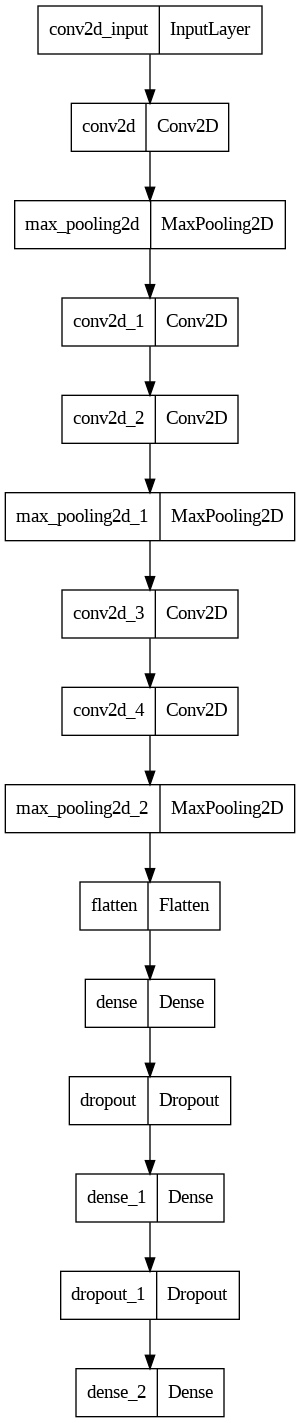

In [58]:
from tensorflow.keras.utils import plot_model

from IPython.display import Image
plot_model(model_CNN,to_file='CNNBASE.png')
Image('CNNBASE.png')

In [59]:
model_CNN.compile(optimizer=optimiser, loss = 'mse', \
              metrics = 'mse')

print(model_CNN.summary())

model_CNN.fit(X_train2, Y_train, epochs=epochs, batch_size=batch_size,
          callbacks = [early_stopping,TimingCallback()])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 63, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 31, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 31, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 15, 128)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 15, 256)        2

KeyboardInterrupt: ignored